In [11]:
#pip install selenium beautifulsoup4 pandas

In [12]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
import pandas as pd

# ÎìúÎùºÏù¥Î≤Ñ ÏÑ§Ï†ï
driver_path = "C:/tools/chromedriver-win64/chromedriver.exe"
service = Service(executable_path=driver_path)
options = Options()
options.add_argument("--start-maximized")
options.add_experimental_option("detach", True)  # Î∏åÎùºÏö∞Ï†Ä ÏûêÎèô Ï¢ÖÎ£å Î∞©ÏßÄ
driver = webdriver.Chrome(service=service, options=options)

# ÏÉÅÌíà ÏÉÅÏÑ∏ ÌéòÏù¥ÏßÄ Ïó¥Í∏∞
url = "https://brand.naver.com/popmart/products/10643619141"
driver.get(url)
wait = WebDriverWait(driver, 10)

# [1] Î¶¨Î∑∞ Î≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠
try:
    time.sleep(2)  # ÌéòÏù¥ÏßÄ Ï¥àÍ∏∞ Î°úÎî© ÎåÄÍ∏∞
    driver.execute_script("window.scrollBy(0, 1000)")  # ÏïÑÎûòÎ°ú Ïä§ÌÅ¨Î°§Ìï¥Ïïº Î¶¨Î∑∞ ÌÉ≠ Î≥¥ÏûÑ O
    review_tab = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "div a._2IbcpXeCHH")))
    review_tab.click()
    #time.sleep(2)
    #driver.execute_script("window.scrollBy(7433, 8333)")
    print("‚úÖ Î¶¨Î∑∞ Î≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏôÑÎ£å")
except Exception as e:
    print("‚ùå Î¶¨Î∑∞ Î≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠ Ïã§Ìå®:", e)


# ‚úÖ 4. Î¶¨Î∑∞ ÏàòÏßë
review_list = []

# ‚úÖ ÏàòÏßëÌï† ÌéòÏù¥ÏßÄ Ïàò ÏßÄÏ†ï (Ïòà: 5ÌéòÏù¥ÏßÄ x 20Í∞ú = ÏµúÎåÄ 100Í∞ú Î¶¨Î∑∞)
for page in range(5):
    time.sleep(2)

    # ‚úÖ ÌòÑÏû¨ ÌéòÏù¥ÏßÄÏùò Î¶¨Î∑∞ 20Í∞ú Ï∂îÏ∂ú 
    try:
        review_items = WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'div._1kMfD5ErZ6 > span._2L3vDiadT9'))
        )
        for r in review_items:
            text = r.text.strip()
            if text:
                review_list.append(text)
        print(f"‚úÖ {page + 1}ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ {len(review_items)}Í∞ú ÏàòÏßë ÏôÑÎ£å")
    except:
        print(f"‚ùå {page + 1}ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ Î°úÎî© Ïã§Ìå®")
        break

# Ï¢ÖÎ£å
time.sleep(3)
driver.quit()

# Ï†ÄÏû•
df = pd.DataFrame(review_list, columns=["review"])
df.to_csv("store_reviews.csv", index=False, encoding="utf-8-sig")
print("Ï¥ù ÏàòÏßëÎêú Î¶¨Î∑∞ Ïàò:", len(df))
df.head()

‚úÖ Î¶¨Î∑∞ Î≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏôÑÎ£å
‚úÖ 1ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
‚úÖ 2ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
‚úÖ 3ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
‚úÖ 4ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
‚úÖ 5ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
Ï¥ù ÏàòÏßëÎêú Î¶¨Î∑∞ Ïàò: 100


review
0  Ïñ¥Î†µÍ≤åÏñ¥Î†µÍ≤å ÎìúÎîîÏñ¥ ÎùºÎ∂ÄÎ∂Ä!!!\nÎ™ªÏÇ¥Ï§ÑÏïåÏïòÎäîÎç∞ ÏÑ±Í≥µÌñàÏäµÎãàÎã§.\nÎùºÎ∂ÄÎ∂ÄÎ•º ÏÇ¥ÏàòÏûàÎã§Îäî...
1  ÏïÑÏù¥Í∞Ä ÎùºÎ∂ÄÎ∂Ä ÌïúÎ≤à Í≤ÄÏÉâ Ìï¥ Î≥¥ÎùºÍ≥† ÌñàÏùÑÎïê Í∑∏Í≤å Î≠êÏïº ÌïòÍ≥† Í∑∏ÎÉ• ÎÑòÍ≤ºÏóàÎäîÎç∞ Ïö∞Ïó∞Ìûà ...
2  Í∑ÄÏóΩÍ∏∞Îäî ÏóÑÏ≤≠ Í∑ÄÏó¨ÏõåÏöî 3Ïãú Ï¢Ä ÎÑòÏñ¥ÏÑú Ïñ¥Ï∞åÏ†ÄÏ∞å 6Í∞ú Íµ¨Îß§ÌñàÏñ¥Ïú† ÎÑàÎ¨¥ „Ñ±Ïã†ÎÇòÍ≥† Í∏∞ÎåÄ...
3  ÎêòÌåîÏù¥Îì§ÌïúÌÖå ÏïàÎÇöÏù¥Í≥† Ï†ïÏÉÅÍ∞ÄÎ°ú Íµ¨Îß§Ìïú ÎÇòÎÖÄÏÑù ÎÑò Ïπ≠Ï∞¨Ìï® „Öã„Öã„Öã\nÎÑà~~~~~Î¨¥ÎÑàÎ¨¥ ...
4  ÎåÄÍ∏∞ÌïòÎã§ Ïö¥Ï¢ãÍ≤å ÎëêÍ∞ú Íµ¨ÏûÖ!\nÏ≤òÏùå ÎèÑÏ†ÑÏù¥ÏóàÎäîÎç∞ Íµ¨ÏûÖÌï†ÏàòÏûàÏñ¥ÏÑú ÎÑàÎ¨¥Í∞êÏÇ¨„Ö†„Ö†\nÌïòÎÇòÎäî...

In [13]:
import re

def clean_review(text):
    # 1. Ïù¥Î™®ÏßÄ Ï†úÍ±∞
    text = re.sub(r'[^\w\s.,!?„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]', '', text)

    # 2. ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞ (Í∏∞Î≥∏Ï†ÅÏù∏ Î¨∏Ïû•Î∂ÄÌò∏Îäî ÎÇ®ÍπÄ)
    text = re.sub(r'[_~^¬∑‚Ä¢‚òÜ‚òÖ‚ñ∂Ô∏è‚úîÔ∏è‚ù§]+', '', text)

    # 3. Î∞òÎ≥µ ÏûêÏùå/Î™®Ïùå Ï†úÍ±∞
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)  # „Öã„Öã„Öã„Öã ‚Üí „Öã„Öã

    # 4. Ï§ÑÎ∞îÍøà Ï†úÍ±∞
    text = re.sub(r'\n', ' ', text)
    
    # 5. ÎÑàÎ¨¥ ÏßßÏùÄ Î¶¨Î∑∞ Ï†úÍ±∞
    if len(text.strip()) < 5:
        return None
    
    return text.strip()


In [14]:
# Ï†ÑÏ≤òÎ¶¨Îêú Î¶¨Ïä§Ìä∏ ÏÉùÏÑ±
cleaned_reviews = []

for review in review_list:
    cleaned = clean_review(review)
    if cleaned:
        cleaned_reviews.append(cleaned)

print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å! Ïú†Ìö®Ìïú Î¶¨Î∑∞ Í∞úÏàò: {len(cleaned_reviews)}")

# Îã§Ïãú CSV Ï†ÄÏû•
import pandas as pd
df = pd.DataFrame({'review': cleaned_reviews})
df.to_csv("naver_reviews_cleaned.csv", index=False, encoding='utf-8-sig')


‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å! Ïú†Ìö®Ìïú Î¶¨Î∑∞ Í∞úÏàò: 100


In [15]:
#pip install transformers torch pandas tqdm

In [16]:
# KoBART ÏöîÏïΩ Î™®Îç∏ Î°úÎìú

from transformers import PreTrainedTokenizerFast, BartForConditionalGeneration

# KoBART ÏöîÏïΩ Î™®Îç∏ (SKT-AI Í≥µÍ∞ú Î™®Îç∏)
tokenizer = PreTrainedTokenizerFast.from_pretrained("digit82/kobart-summarization")
model = BartForConditionalGeneration.from_pretrained("digit82/kobart-summarization")


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels will be overwritten to 2.


In [17]:
# Î¶¨Î∑∞ Î∂àÎü¨ÏôÄ ÏöîÏïΩ Ïã§Ìñâ

import pandas as pd
from tqdm import tqdm

# Ï†ÑÏ≤òÎ¶¨Îêú Î¶¨Î∑∞ ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("naver_reviews_cleaned.csv")
df = df.dropna()

# ÏöîÏïΩ Ïª¨Îüº ÏÉùÏÑ±
summaries = []
for review in tqdm(df['review']):
    try:
        summary = kobart_summarize(review)
    except:
        summary = "ÏöîÏïΩ Ïã§Ìå®"
    summaries.append(summary)

df['summary'] = summaries


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 209715.20it/s]


In [18]:
# Í≤∞Í≥º Ï†ÄÏû•

df.to_csv("naver_reviews_summary_kobart.csv", index=False, encoding='utf-8-sig')
print("‚úÖ Ï†ÄÏû• ÏôÑÎ£å!")

‚úÖ Ï†ÄÏû• ÏôÑÎ£å!


In [19]:
# KoELECTRA Í∞êÏÑ±Î∂ÑÏÑù

from transformers import ElectraTokenizer, ElectraForSequenceClassification
import torch

# Î™®Îç∏Í≥º ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†Ä Î°úÎìú
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-discriminator")
model = ElectraForSequenceClassification.from_pretrained("monologg/koelectra-base-discriminator", num_labels=2)
model.eval()

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at monologg/koelectra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ElectraForSequenceClassification(
  (electra): ElectraModel(
    (embeddings): ElectraEmbeddings(
      (word_embeddings): Embedding(32200, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): ElectraEncoder(
      (layer): ModuleList(
        (0-11): 12 x ElectraLayer(
          (attention): ElectraAttention(
            (self): ElectraSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): ElectraSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): L

In [20]:
# Í∞êÏ†ï Î∂ÑÏÑù Ìï®Ïàò

def predict_sentiment(text):
    # ÏûÖÎ†• Ï†ÑÏ≤òÎ¶¨
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
    
    # Î™®Îç∏ Ï∂îÎ°†
    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits
        predicted = torch.argmax(logits, dim=1).item()
    
    # Í≤∞Í≥º Î∞òÌôò
    return "Í∏çÏ†ï" if predicted == 1 else "Î∂ÄÏ†ï"


In [21]:
# ÏöîÏïΩÍ≥º Í∞êÏÑ±Î∂ÑÏÑù Ìï®Íªò Ï†ÅÏö©

from tqdm import tqdm
import pandas as pd

# Î¶¨Î∑∞ Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("naver_reviews_cleaned.csv").dropna()

# Í≤∞Í≥º Ï†ÄÏû•Ïö© Î¶¨Ïä§Ìä∏
summaries = []
sentiments = []

# Î∞òÎ≥µ Ï≤òÎ¶¨
for review in tqdm(df['review']):
    try:
        summary = kobart_summarize(review)
        sentiment = predict_sentiment(review)
    except:
        summary = "ÏöîÏïΩ Ïã§Ìå®"
        sentiment = "Î∂ÑÏÑù Ïã§Ìå®"
    
    summaries.append(summary)
    sentiments.append(sentiment)

df['summary'] = summaries
df['sentiment'] = sentiments


100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [00:00<00:00, 572992.35it/s]


In [22]:
# ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•

df.to_csv("naver_reviews_summary_sentiment.csv", index=False, encoding='utf-8-sig')
print("‚úÖ ÏöîÏïΩ + Í∞êÏÑ±Î∂ÑÏÑù Ï†ÄÏû• ÏôÑÎ£å")


‚úÖ ÏöîÏïΩ + Í∞êÏÑ±Î∂ÑÏÑù Ï†ÄÏû• ÏôÑÎ£å


In [23]:
# ÏãúÍ∞ÅÌôî
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("naver_reviews_summary_sentiment.csv")
df = df.dropna(subset=["sentiment"])
df.head()


review summary sentiment
0  Ïñ¥Î†µÍ≤åÏñ¥Î†µÍ≤å ÎìúÎîîÏñ¥ ÎùºÎ∂ÄÎ∂Ä!! Î™ªÏÇ¥Ï§ÑÏïåÏïòÎäîÎç∞ ÏÑ±Í≥µÌñàÏäµÎãàÎã§. ÎùºÎ∂ÄÎ∂ÄÎ•º ÏÇ¥ÏàòÏûàÎã§Îäî ÏùëÎ™®...   ÏöîÏïΩ Ïã§Ìå®     Î∂ÑÏÑù Ïã§Ìå®
1  ÏïÑÏù¥Í∞Ä ÎùºÎ∂ÄÎ∂Ä ÌïúÎ≤à Í≤ÄÏÉâ Ìï¥ Î≥¥ÎùºÍ≥† ÌñàÏùÑÎïê Í∑∏Í≤å Î≠êÏïº ÌïòÍ≥† Í∑∏ÎÉ• ÎÑòÍ≤ºÏóàÎäîÎç∞ Ïö∞Ïó∞Ìûà ...   ÏöîÏïΩ Ïã§Ìå®     Î∂ÑÏÑù Ïã§Ìå®
2  Í∑ÄÏóΩÍ∏∞Îäî ÏóÑÏ≤≠ Í∑ÄÏó¨ÏõåÏöî 3Ïãú Ï¢Ä ÎÑòÏñ¥ÏÑú Ïñ¥Ï∞åÏ†ÄÏ∞å 6Í∞ú Íµ¨Îß§ÌñàÏñ¥Ïú† ÎÑàÎ¨¥ „Ñ±Ïã†ÎÇòÍ≥† Í∏∞ÎåÄ...   ÏöîÏïΩ Ïã§Ìå®     Î∂ÑÏÑù Ïã§Ìå®
3  ÎêòÌåîÏù¥Îì§ÌïúÌÖå ÏïàÎÇöÏù¥Í≥† Ï†ïÏÉÅÍ∞ÄÎ°ú Íµ¨Îß§Ìïú ÎÇòÎÖÄÏÑù ÎÑò Ïπ≠Ï∞¨Ìï® „Öã„Öã ÎÑàÎ¨¥ÎÑàÎ¨¥ Í∑ÄÏó¨ÏõåÏöî. ÏÉà...   ÏöîÏïΩ Ïã§Ìå®     Î∂ÑÏÑù Ïã§Ìå®
4  ÎåÄÍ∏∞ÌïòÎã§ Ïö¥Ï¢ãÍ≤å ÎëêÍ∞ú Íµ¨ÏûÖ! Ï≤òÏùå ÎèÑÏ†ÑÏù¥ÏóàÎäîÎç∞ Íµ¨ÏûÖÌï†ÏàòÏûàÏñ¥ÏÑú ÎÑàÎ¨¥Í∞êÏÇ¨„Ö†„Ö† ÌïòÎÇòÎäî Ï†Ä...   ÏöîÏïΩ Ïã§Ìå®     Î∂ÑÏÑù Ïã§Ìå®

In [24]:
# Í∞êÏÑ± Î∂ÑÌè¨ ÌôïÏù∏

# Í∞êÏ†ï ÎùºÎ≤® Î∂ÑÌè¨
#sentiment_counts = df["sentiment"].value_counts()
#print(sentiment_counts)


In [27]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨ ÏÑ§Ïπò (ÌïÑÏöî Ïãú)
#!pip install transformers tqdm selenium pandas torch --quiet

# 2. ÌïÑÏöîÌïú Î™®Îìà ÏûÑÌè¨Ìä∏
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

import time
import re
import pandas as pd
from tqdm import tqdm
import torch

from transformers import PreTrainedTokenizerFast, BartForConditionalGeneration
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# ----------------------------------------------

# 3. ÌÅ¨Î°¨ ÎìúÎùºÏù¥Î≤Ñ ÏÑ§Ï†ï Î∞è ÎÑ§Ïù¥Î≤ÑÏä§ÌÜ†Ïñ¥ Î¶¨Î∑∞ ÌéòÏù¥ÏßÄ Ïó¥Í∏∞
driver_path = "C:/tools/chromedriver-win64/chromedriver.exe"  # ÌÅ¨Î°¨ÎìúÎùºÏù¥Î≤Ñ Í≤ΩÎ°ú ÏàòÏ†ï ÌïÑÏöî

service = Service(executable_path=driver_path)
options = Options()
options.add_argument("--start-maximized")
options.add_experimental_option("detach", True)  # Î∏åÎùºÏö∞Ï†Ä Îã´ÌûàÏßÄ ÏïäÍ≤å Ïú†ÏßÄ

driver = webdriver.Chrome(service=service, options=options)

url = "https://brand.naver.com/popmart/products/10643619141"  # ÏòàÏãú ÏÉÅÌíà URL
driver.get(url)
wait = WebDriverWait(driver, 10)

# Î¶¨Î∑∞ ÌÉ≠ ÌÅ¥Î¶≠ (ÏÉÅÌíà ÌéòÏù¥ÏßÄ Ïä§ÌÅ¨Î°§ ÌõÑ ÌÅ¥Î¶≠)
time.sleep(3)
driver.execute_script("window.scrollBy(0, 1000)")

try:
    # Î¶¨Î∑∞ ÌÉ≠ Î≤ÑÌäº Ï∞æÍ∏∞ (CSS SelectorÎäî ÏÇ¨Ïù¥Ìä∏ Íµ¨Ï°∞Ïóê Îî∞Îùº Î≥ÄÍ≤Ω Í∞ÄÎä•)
    review_tab = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "div a._2IbcpXeCHH")))
    review_tab.click()
    print("‚úÖ Î¶¨Î∑∞ ÌÉ≠ ÌÅ¥Î¶≠ ÏÑ±Í≥µ")
except Exception as e:
    print("‚ùå Î¶¨Î∑∞ ÌÉ≠ ÌÅ¥Î¶≠ Ïã§Ìå®:", e)

time.sleep(3)

# ----------------------------------------------

# 4. Î¶¨Î∑∞ ÌÅ¨Î°§ÎßÅ Ìï®Ïàò (Ìïú ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ ÏàòÏßë Î∞è Îã§Ïùå ÌéòÏù¥ÏßÄ Ïù¥Îèô)

def crawl_reviews(pages=5):
    review_texts = []
    for page in range(pages):
        time.sleep(2)
        try:
            time.sleep(2)  # ÌéòÏù¥ÏßÄ Ï¥àÍ∏∞ Î°úÎî© ÎåÄÍ∏∞
            driver.execute_script("window.scrollBy(0, 1000)")  # Î¶¨Î∑∞ ÌÉ≠ Î≥¥Ïù¥ÎèÑÎ°ù Ïä§ÌÅ¨Î°§
            review_tab = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "a._2IbcpXeCHH")))
            review_tab.click()
            print("‚úÖ Î¶¨Î∑∞ Î≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏôÑÎ£å")
        except Exception as e:
            print("‚ùå Î¶¨Î∑∞ Î≥¥Í∏∞ Î≤ÑÌäº ÌÅ¥Î¶≠ Ïã§Ìå®:", e)

review_list = []

# 5ÌéòÏù¥ÏßÄ ÌÅ¨Î°§ÎßÅ Î∞òÎ≥µ
for page in range(5):
    time.sleep(2)

    # Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏãúÎèÑ
    try:
        review_items = wait.until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'div._1kMfD5ErZ6 > span._2L3vDiadT9'))
        )
        for r in review_items:
            text = r.text.strip()
            if text:
                review_list.append(text)
        print(f"‚úÖ {page + 1}ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ {len(review_items)}Í∞ú ÏàòÏßë ÏôÑÎ£å")
    except Exception as e:
        print(f"‚ùå {page + 1}ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ Î°úÎî© Ïã§Ìå®:", e)
        break

    # Îã§Ïùå ÌéòÏù¥ÏßÄ Î≤ÑÌäº ÌÅ¥Î¶≠ (ÎßàÏßÄÎßâ ÌéòÏù¥ÏßÄÏùº Í≤ΩÏö∞ Ïã§Ìå® Í∞ÄÎä•)
    try:
        next_button = wait.until(
            EC.element_to_be_clickable((By.CSS_SELECTOR, 'a.fAUKm1ewwo._2Ar8-aEUTq._nlog_click[aria-hidden="false"]'))
        )
        next_button.click()
        print("‚úÖ Îã§Ïùå ÌéòÏù¥ÏßÄ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏôÑÎ£å")
    except Exception as e:
        print("‚ùå Îã§Ïùå ÌéòÏù¥ÏßÄ Î≤ÑÌäº ÌÅ¥Î¶≠ Ïã§Ìå®:", e)
        break

time.sleep(3)
driver.quit()

# ÏàòÏßëÌïú Î¶¨Î∑∞ DataFrameÏúºÎ°ú Ï†ÄÏû•
df = pd.DataFrame(review_list, columns=["review"])
df.to_csv("naver_store_reviews.csv", index=False, encoding="utf-8-sig")
print(f"Ï¥ù ÏàòÏßëÎêú Î¶¨Î∑∞ Ïàò: {len(df)}")

driver.quit()

# ----------------------------------------------

# 5. Î¶¨Î∑∞ Ï†ÑÏ≤òÎ¶¨ Ìï®Ïàò

def clean_review(text):
    text = re.sub(r'[^\w\s.,!?„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£]', '', text)  # Ïù¥Î™®ÏßÄ Ï†úÍ±∞
    text = re.sub(r'[_~^¬∑‚Ä¢‚òÜ‚òÖ‚ñ∂Ô∏è‚úîÔ∏è‚ù§]+', '', text)           # ÌäπÏàòÎ¨∏Ïûê Ï†úÍ±∞
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)             # Î∞òÎ≥µ ÏûêÏùå/Î™®Ïùå Ï∂ïÏÜå
    text = re.sub("\n", " ", text)                          # Ï§ÑÎ∞îÍøà Ï†úÍ±∞
    if len(text.strip()) < 5:
        return None
    return text.strip()

cleaned_reviews = [clean_review(r) for r in review_list]
cleaned_reviews = [r for r in cleaned_reviews if r]

print(f"‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å, Ïú†Ìö® Î¶¨Î∑∞ Í∞úÏàò: {len(cleaned_reviews)}")

df = pd.DataFrame({'review': cleaned_reviews})
df.to_csv("naver_reviews_cleaned.csv", index=False, encoding='utf-8-sig')

# ----------------------------------------------

# 6. KoBART ÏöîÏïΩ Î™®Îç∏ Î°úÎìú

tokenizer_kobart = PreTrainedTokenizerFast.from_pretrained("digit82/kobart-summarization")
model_kobart = BartForConditionalGeneration.from_pretrained("digit82/kobart-summarization")
model_kobart.eval()

def kobart_summarize(text):
    if len(text) < 10:
        return "ÏöîÏïΩ Î∂àÍ∞Ä"
    inputs = tokenizer_kobart.encode(text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model_kobart.generate(inputs, max_length=64, min_length=10, length_penalty=2.0,
                                       num_beams=4, early_stopping=True)
    summary = tokenizer_kobart.decode(summary_ids[0], skip_special_tokens=True)
    return summary

# ----------------------------------------------

# 7. KoELECTRA Í∞êÏÑ±Î∂ÑÏÑù Î™®Îç∏ Î°úÎìú (Í∞êÏÑ±Î∂ÑÏÑùÏö© fine-tuned Î™®Îç∏)

tokenizer_electra = AutoTokenizer.from_pretrained("beomi/KcELECTRA-base")
model_electra = AutoModelForSequenceClassification.from_pretrained("beomi/KcELECTRA-base")
model_electra.eval()

def predict_sentiment(text):
    inputs = tokenizer_electra(text, return_tensors="pt", truncation=True, padding=True, max_length=256)
    with torch.no_grad():
        outputs = model_electra(**inputs)
        logits = outputs.logits
        predicted = torch.argmax(logits, dim=1).item()
    return "Í∏çÏ†ï" if predicted == 1 else "Î∂ÄÏ†ï"

# ----------------------------------------------

# 8. Î¶¨Î∑∞Ïóê ÏöîÏïΩÍ≥º Í∞êÏÑ±Î∂ÑÏÑù Ìï®Íªò Ï†ÅÏö©

summaries = []
sentiments = []

for review in tqdm(df['review']):
    try:
        summary = kobart_summarize(review)
        sentiment = predict_sentiment(review)
    except Exception as e:
        summary = "ÏöîÏïΩ Ïã§Ìå®"
        sentiment = "Î∂ÑÏÑù Ïã§Ìå®"
    summaries.append(summary)
    sentiments.append(sentiment)

df['summary'] = summaries
df['sentiment'] = sentiments

# ----------------------------------------------

# 9. ÏµúÏ¢Ö Í≤∞Í≥º Ï†ÄÏû•

df.to_csv("naver_reviews_summary_sentiment.csv", index=False, encoding='utf-8-sig')
print("‚úÖ ÏöîÏïΩ Î∞è Í∞êÏÑ±Î∂ÑÏÑù ÏôÑÎ£å, Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!")


‚úÖ Î¶¨Î∑∞ ÌÉ≠ ÌÅ¥Î¶≠ ÏÑ±Í≥µ
‚úÖ 1ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
‚úÖ Îã§Ïùå ÌéòÏù¥ÏßÄ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏôÑÎ£å
‚úÖ 2ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
‚úÖ Îã§Ïùå ÌéòÏù¥ÏßÄ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏôÑÎ£å
‚úÖ 3ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
‚úÖ Îã§Ïùå ÌéòÏù¥ÏßÄ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏôÑÎ£å
‚úÖ 4ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
‚úÖ Îã§Ïùå ÌéòÏù¥ÏßÄ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏôÑÎ£å
‚úÖ 5ÌéòÏù¥ÏßÄ Î¶¨Î∑∞ 20Í∞ú ÏàòÏßë ÏôÑÎ£å
‚úÖ Îã§Ïùå ÌéòÏù¥ÏßÄ Î≤ÑÌäº ÌÅ¥Î¶≠ ÏôÑÎ£å
Ï¥ù ÏàòÏßëÎêú Î¶¨Î∑∞ Ïàò: 100
‚úÖ Ï†ÑÏ≤òÎ¶¨ ÏôÑÎ£å, Ïú†Ìö® Î¶¨Î∑∞ Í∞úÏàò: 100


You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels will be overwritten to 2.
Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at beomi/KcELECTRA-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 100/100 [04:16<00:00,  2.57s/it]

‚úÖ ÏöîÏïΩ Î∞è Í∞êÏÑ±Î∂ÑÏÑù ÏôÑÎ£å, Í≤∞Í≥º Ï†ÄÏû• ÏôÑÎ£å!


In [30]:
df2 = pd.read_csv("naver_reviews_summary_sentiment.csv")
print(df2.head())

                                              review  \
0  Ïñ¥Î†µÍ≤åÏñ¥Î†µÍ≤å ÎìúÎîîÏñ¥ ÎùºÎ∂ÄÎ∂Ä!! Î™ªÏÇ¥Ï§ÑÏïåÏïòÎäîÎç∞ ÏÑ±Í≥µÌñàÏäµÎãàÎã§. ÎùºÎ∂ÄÎ∂ÄÎ•º ÏÇ¥ÏàòÏûàÎã§Îäî ÏùëÎ™®...   
1  ÏïÑÏù¥Í∞Ä ÎùºÎ∂ÄÎ∂Ä ÌïúÎ≤à Í≤ÄÏÉâ Ìï¥ Î≥¥ÎùºÍ≥† ÌñàÏùÑÎïê Í∑∏Í≤å Î≠êÏïº ÌïòÍ≥† Í∑∏ÎÉ• ÎÑòÍ≤ºÏóàÎäîÎç∞ Ïö∞Ïó∞Ìûà ...   
2  Í∑ÄÏóΩÍ∏∞Îäî ÏóÑÏ≤≠ Í∑ÄÏó¨ÏõåÏöî 3Ïãú Ï¢Ä ÎÑòÏñ¥ÏÑú Ïñ¥Ï∞åÏ†ÄÏ∞å 6Í∞ú Íµ¨Îß§ÌñàÏñ¥Ïú† ÎÑàÎ¨¥ „Ñ±Ïã†ÎÇòÍ≥† Í∏∞ÎåÄ...   
3  ÎêòÌåîÏù¥Îì§ÌïúÌÖå ÏïàÎÇöÏù¥Í≥† Ï†ïÏÉÅÍ∞ÄÎ°ú Íµ¨Îß§Ìïú ÎÇòÎÖÄÏÑù ÎÑò Ïπ≠Ï∞¨Ìï® „Öã„Öã ÎÑàÎ¨¥ÎÑàÎ¨¥ Í∑ÄÏó¨ÏõåÏöî. ÏÉà...   
4  ÎåÄÍ∏∞ÌïòÎã§ Ïö¥Ï¢ãÍ≤å ÎëêÍ∞ú Íµ¨ÏûÖ! Ï≤òÏùå ÎèÑÏ†ÑÏù¥ÏóàÎäîÎç∞ Íµ¨ÏûÖÌï†ÏàòÏûàÏñ¥ÏÑú ÎÑàÎ¨¥Í∞êÏÇ¨„Ö†„Ö† ÌïòÎÇòÎäî Ï†Ä...   

                                             summary sentiment  
0  Í∑ÄÏó¨Ïö¥ ÎùºÎ∂ÄÎ∂ÄÎ•º ÏÇ¥ÏàòÏûàÎã§Îäî ÏùëÎ™®ÎèÑ Ìï¥Î≥¥Í≥† ÏùëÎ™®ÎèÑ Ìï¥Î≥¥Í≥† ÌñàÏßÄÎßå Îã§ Ïã§Ìå®ÌïòÎçò Ï§ëÏóê, ...        Î∂ÄÏ†ï  
1  ÏïÑÏù¥Í∞Ä ÎùºÎ∂ÄÎ∂Ä ÌïúÎ≤à Í≤ÄÏÉâ Ìï¥ Î≥¥ÎùºÍ≥† ÌñàÏùÑÎïê Í∑∏Í≤å Î≠êÏïº ÌïòÍ≥† Í∑∏ÎÉ• ÎÑòÍ≤ºÏóàÎäîÎç∞ Ïö∞Ïó∞Ìûà 

In [31]:
print(df2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     100 non-null    object
 1   summary    100 non-null    object
 2   sentiment  100 non-null    object
dtypes: object(3)
memory usage: 2.5+ KB
None


In [8]:
import sys
!{sys.executable} -m pip install wordcloud

  Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.4-cp313-cp313-win_amd64.whl (300 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [10]:
# Í∞êÏÑ±Î∂ÑÏÑù + ÏöîÏïΩÏù¥ Ï†ÄÏû•Îêú ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("naver_reviews_summary_sentiment.csv")

# Í∏∞Î≥∏ Íµ¨Ï°∞ ÌôïÏù∏
print(df.head())
print(df['sentiment'].value_counts())


                                              review  \
0  Ïñ¥Î†µÍ≤åÏñ¥Î†µÍ≤å ÎìúÎîîÏñ¥ ÎùºÎ∂ÄÎ∂Ä!! Î™ªÏÇ¥Ï§ÑÏïåÏïòÎäîÎç∞ ÏÑ±Í≥µÌñàÏäµÎãàÎã§. ÎùºÎ∂ÄÎ∂ÄÎ•º ÏÇ¥ÏàòÏûàÎã§Îäî ÏùëÎ™®...   
1  ÏïÑÏù¥Í∞Ä ÎùºÎ∂ÄÎ∂Ä ÌïúÎ≤à Í≤ÄÏÉâ Ìï¥ Î≥¥ÎùºÍ≥† ÌñàÏùÑÎïê Í∑∏Í≤å Î≠êÏïº ÌïòÍ≥† Í∑∏ÎÉ• ÎÑòÍ≤ºÏóàÎäîÎç∞ Ïö∞Ïó∞Ìûà ...   
2  Í∑ÄÏóΩÍ∏∞Îäî ÏóÑÏ≤≠ Í∑ÄÏó¨ÏõåÏöî 3Ïãú Ï¢Ä ÎÑòÏñ¥ÏÑú Ïñ¥Ï∞åÏ†ÄÏ∞å 6Í∞ú Íµ¨Îß§ÌñàÏñ¥Ïú† ÎÑàÎ¨¥ „Ñ±Ïã†ÎÇòÍ≥† Í∏∞ÎåÄ...   
3  ÎêòÌåîÏù¥Îì§ÌïúÌÖå ÏïàÎÇöÏù¥Í≥† Ï†ïÏÉÅÍ∞ÄÎ°ú Íµ¨Îß§Ìïú ÎÇòÎÖÄÏÑù ÎÑò Ïπ≠Ï∞¨Ìï® „Öã„Öã ÎÑàÎ¨¥ÎÑàÎ¨¥ Í∑ÄÏó¨ÏõåÏöî. ÏÉà...   
4  ÎåÄÍ∏∞ÌïòÎã§ Ïö¥Ï¢ãÍ≤å ÎëêÍ∞ú Íµ¨ÏûÖ! Ï≤òÏùå ÎèÑÏ†ÑÏù¥ÏóàÎäîÎç∞ Íµ¨ÏûÖÌï†ÏàòÏûàÏñ¥ÏÑú ÎÑàÎ¨¥Í∞êÏÇ¨„Ö†„Ö† ÌïòÎÇòÎäî Ï†Ä...   

                                             summary sentiment  
0  Í∑ÄÏó¨Ïö¥ ÎùºÎ∂ÄÎ∂ÄÎ•º ÏÇ¥ÏàòÏûàÎã§Îäî ÏùëÎ™®ÎèÑ Ìï¥Î≥¥Í≥† ÏùëÎ™®ÎèÑ Ìï¥Î≥¥Í≥† ÌñàÏßÄÎßå Îã§ Ïã§Ìå®ÌïòÎçò Ï§ëÏóê, ...        Î∂ÄÏ†ï  
1  ÏïÑÏù¥Í∞Ä ÎùºÎ∂ÄÎ∂Ä ÌïúÎ≤à Í≤ÄÏÉâ Ìï¥ Î≥¥ÎùºÍ≥† ÌñàÏùÑÎïê Í∑∏Í≤å Î≠êÏïº ÌïòÍ≥† Í∑∏ÎÉ• ÎÑòÍ≤ºÏóàÎäîÎç∞ Ïö∞Ïó∞Ìûà 

C:\Users\Hyeonseong\AppData\Local\Temp\ipykernel_28360\3243617130.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')


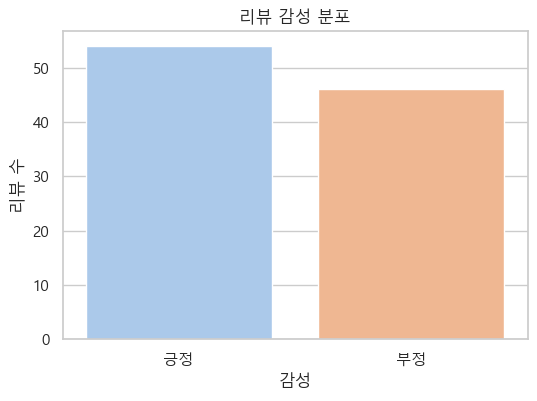

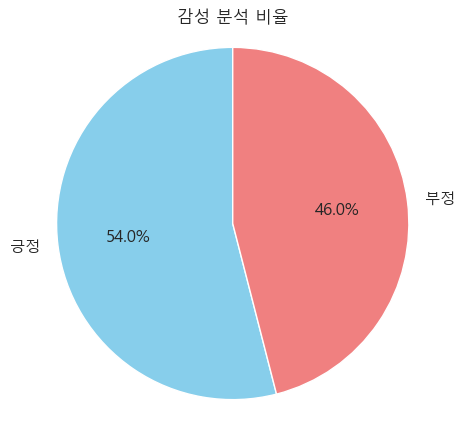

In [14]:
# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("naver_reviews_summary_sentiment.csv")

# Í∞êÏÑ± Î∂ÑÌè¨ Í≥ÑÏÇ∞
sentiment_counts = df['sentiment'].value_counts()

# ÎßâÎåÄÍ∑∏ÎûòÌîÑ
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel')
plt.title("Î¶¨Î∑∞ Í∞êÏÑ± Î∂ÑÌè¨")
plt.xlabel("Í∞êÏÑ±")
plt.ylabel("Î¶¨Î∑∞ Ïàò")
plt.show()

# ÌååÏù¥Ï∞®Ìä∏
plt.figure(figsize=(5, 5))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%.1f%%', startangle=90,
        colors=['skyblue', 'lightcoral'])
plt.title("Í∞êÏÑ± Î∂ÑÏÑù ÎπÑÏú®")
plt.axis('equal')
plt.show()


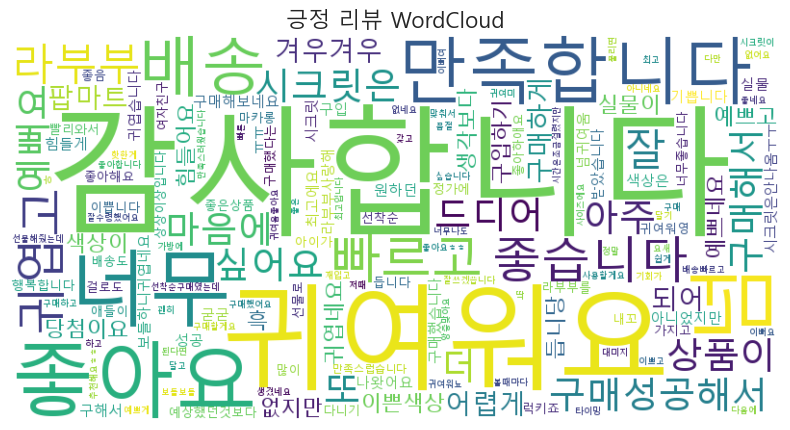

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
df = pd.read_csv("naver_reviews_summary_sentiment.csv")

# ‚úÖ WindowsÏö© ÌïúÍ∏Ä Ìè∞Ìä∏ Í≤ΩÎ°ú ÏßÄÏ†ï (Ïòà: ÎßëÏùÄ Í≥†Îîï)
font_path = "C:/Windows/Fonts/malgun.ttf"

# Í∏çÏ†ï Î¶¨Î∑∞Îßå Ï∂îÏ∂úÌïòÏó¨ ÌïòÎÇòÏùò Î¨∏ÏûêÏó¥Î°ú Í≤∞Ìï©
positive_text = ' '.join(df[df['sentiment'] == 'Í∏çÏ†ï']['review'])

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ±
wordcloud_pos = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate(positive_text)

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Í∏çÏ†ï Î¶¨Î∑∞ WordCloud", fontsize=16)
plt.show()


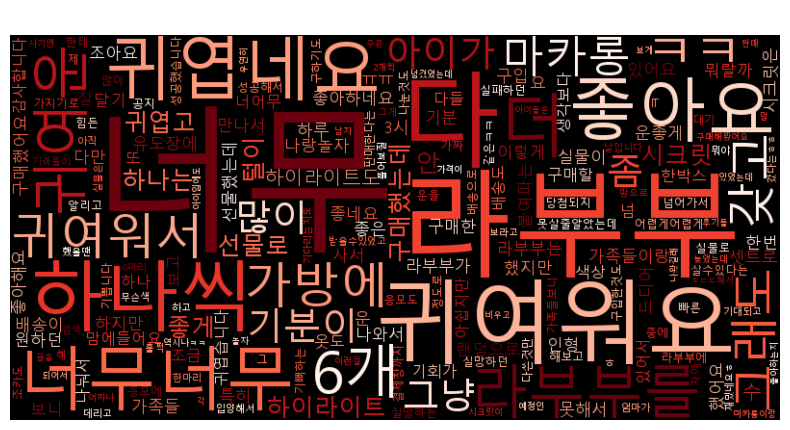

In [17]:
# Î∂ÄÏ†ï Î¶¨Î∑∞
negative_text = ' '.join(df[df['sentiment'] == 'Î∂ÄÏ†ï']['review'])

wordcloud_neg = WordCloud(
    font_path=font_path,
    background_color='black',
    width=800,
    height=400,
    colormap='Reds'
).generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Î∂ÄÏ†ï Î¶¨Î∑∞ WordCloud", fontsize=16, color='white')
plt.show()


In [18]:
# ÌÇ§ÏõåÎìú Ï∂îÏ∂ú (Ï†ÄÏ£º Ïñ∏Í∏âÎêú Îã®Ïñ¥ ÏÉÅÏúÑ 20Í∞ú Ï∂îÏ∂ú)
from collections import Counter
import konlpy
from konlpy.tag import Okt

okt = Okt()

# Î™®Îì† Î¶¨Î∑∞Î•º ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
all_reviews = ' '.join(df['review'])

# Î™ÖÏÇ¨ Ï∂îÏ∂ú
nouns = okt.nouns(all_reviews)
nouns = [n for n in nouns if len(n) > 1]  # Ìïú Í∏ÄÏûê Ï†úÍ±∞

# ÏÉÅÏúÑ 20Í∞ú Ï∂úÎ†•
top_nouns = Counter(nouns).most_common(20)
print(top_nouns)


[('Íµ¨Îß§', 32), ('Î∂ÄÎ∂Ä', 30), ('ÏãúÌÅ¨Î¶ø', 13), ('ÌïòÎÇò', 12), ('Î∞∞ÏÜ°', 12), ('ÏÑ†Î¨º', 10), ('Í∞ÄÏ°±', 8), ('Ïã§Î¨º', 7), ('ÎßàÏπ¥Î°±', 7), ('ÏÉâÏÉÅ', 7), ('ÌïòÏù¥ÎùºÏù¥Ìä∏', 7), ('Íµ¨ÏûÖ', 6), ('ÏïÑÏù¥', 6), ('Í∏∞Î∂Ñ', 5), ('Í∞ÄÎ∞©', 5), ('Î∞ïÏä§', 4), ('Îã§Ïùå', 4), ('Í∏∞Ìöå', 4), ('ÏÉùÍ∞Å', 4), ('ÏÉÅÌíà', 4)]


In [19]:
#pip install streamlit wordcloud matplotlib pandas

Note: you may need to restart the kernel to use updated packages.


2025-08-04 14:35:39.126 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-08-04 14:35:39.127 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2025-08-04 14:35:39.127 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 14:35:39.219 
  command:

    streamlit run C:\Users\Hyeonseong\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-08-04 14:35:39.219 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 14:35:39.220 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 14:35:39.224 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-08-04 14:35:39.224 Thread 'MainThread': m

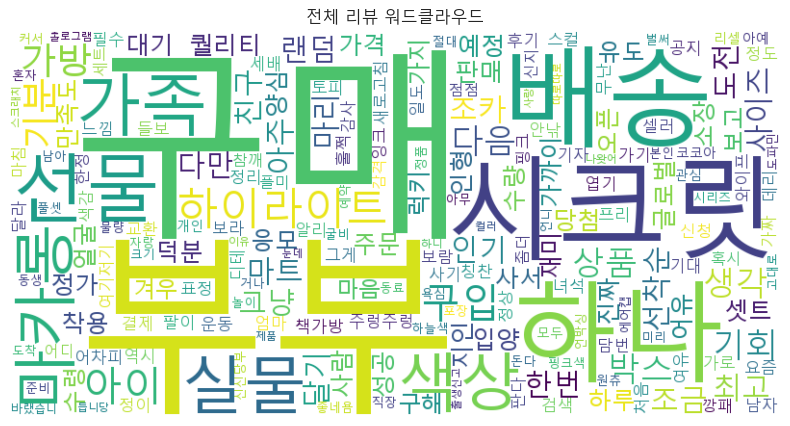

In [20]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from konlpy.tag import Okt

# Ìè∞Ìä∏ ÏÑ§Ï†ï (ÏúàÎèÑÏö∞ Í∏∞Ï§Ä)
plt.rcParams['font.family'] = 'Malgun Gothic'

# Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
@st.cache_data
def load_data():
    return pd.read_csv("naver_reviews_summary_sentiment.csv")

df = load_data()

st.title("üõçÔ∏è ÎÑ§Ïù¥Î≤Ñ Ïä§ÌÜ†Ïñ¥ Î¶¨Î∑∞ Î∂ÑÏÑù ÎåÄÏãúÎ≥¥Îìú")

# Í∞êÏ†ï Î∂ÑÌè¨ ÏãúÍ∞ÅÌôî
st.subheader("1. Í∞êÏÑ± Î∂ÑÏÑù Î∂ÑÌè¨")
sentiment_counts = df['sentiment'].value_counts()
st.bar_chart(sentiment_counts)

# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏÉùÏÑ± Ìï®Ïàò
def draw_wordcloud(texts, title):
    okt = Okt()
    nouns = []
    for t in texts:
        nouns += okt.nouns(t)
    nouns = [n for n in nouns if len(n) > 1]
    count = Counter(nouns)
    
    wc = WordCloud(font_path="malgun.ttf", background_color="white", width=800, height=400)
    cloud = wc.generate_from_frequencies(count)

    plt.figure(figsize=(10, 5))
    plt.imshow(cloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(title)
    st.pyplot(plt)

# Í∏ç/Î∂ÄÏ†ï ÌïÑÌÑ∞ ÏÑ†ÌÉù
sentiment_filter = st.selectbox("üîé Í∞êÏÑ±Î≥Ñ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Î≥¥Í∏∞", ['Ï†ÑÏ≤¥', 'Í∏çÏ†ï', 'Î∂ÄÏ†ï'])

if sentiment_filter == 'Ï†ÑÏ≤¥':
    draw_wordcloud(df['review'], 'Ï†ÑÏ≤¥ Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')
else:
    filtered_df = df[df['sentiment'] == sentiment_filter]
    draw_wordcloud(filtered_df['review'], f'{sentiment_filter} Î¶¨Î∑∞ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú')

# ÏöîÏïΩ Í≤∞Í≥º ÌôïÏù∏
st.subheader("2. Î¶¨Î∑∞ ÏöîÏïΩ ÏòàÏãú")

num_to_show = st.slider("Î¶¨Î∑∞ Í∞úÏàò ÏÑ†ÌÉù", 1, 10, 3)
sample_df = df.sample(n=num_to_show)

for i, row in sample_df.iterrows():
    st.markdown(f"**ÏõêÎ¨∏**: {row['review']}")
    st.markdown(f"**ÏöîÏïΩ**: {row['summary']}")
    st.markdown(f"**Í∞êÏ†ï**: {row['sentiment']}")
    st.markdown("---")
